## 1 - Introduce the Data
Task: Given attributes about a women, predict whether she suffers from Urinary incontinence or not

In [1]:
#import pandas and numpy in Jupyter Notebook enviroment:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_excel("IU.xlsx")
dataset

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_,FuitesUrinaires
0,22,Célibataire,Universitaire,25.631167,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1.0,0,Non fumeur,1
1,59,Veuve,Universitaire,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0,0,0,0,0,0,1.0,1,Non fumeur,1
2,36,Mariée,Primaire,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0,0,0,0,0,0,0.0,0,Non fumeur,1
3,25,Célibataire,Universitaire,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0,Non fumeur,0
4,45,Mariée,Secondaire,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0.0,0,Non fumeur,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,25,Célibataire,Universitaire,21.258503,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0,Non fumeur,0
185,56,Célibataire,Analphabète,27.041644,0.0,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0.0,0,Non fumeur,0
186,45,Divorcée,Analphabète,27.555556,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1.0,0,Non fumeur,1
187,19,Célibataire,Universitaire,24.034610,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0,NaN,0


In [3]:
X = dataset.drop('FuitesUrinaires',axis=1)
Y = dataset.FuitesUrinaires

## 2 - Data Cleaning
### a - Encoding categorical features (Situationfamiliale, NiveauEtude, StatutTabagiqueActif_)
- We will use OrdinalEncoder() to encode categorical features
- We can't use LabelEncoder() because it encodes missing values (nan)
- LabelEncoder is used to encode target values, i.e. y, and not the input X. (from docs https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- We can also use get_dummies in pandas and OneHotEncoder in sci-kit learn

In [4]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Situationfamiliale' has 4 unique categories
Feature 'NiveauEtude' has 4 unique categories
Feature 'StatutTabagiqueActif_' has 5 unique categories


In [5]:
# Create a list of features to dummy
todummy_list = ['Situationfamiliale', 'NiveauEtude', 'StatutTabagiqueActif_']
to_encode_list = ['Situationfamiliale', 'NiveauEtude', 'StatutTabagiqueActif_']

In [6]:
# Function to dummy all the categorical variables used for modeling
# def dummy_dataset(dataset, todummy_list):
#     for x in todummy_list:
#         dummies = pd.get_dummies(dataset[x], prefix=x, dummy_na=False)
#         dataset = dataset.drop(x,axis=1)
#         dataset = pd.concat([dataset, dummies], axis=1)
#     return dataset
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22,Célibataire,Universitaire,25.631167,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,Non fumeur
1,59,Veuve,Universitaire,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,Non fumeur
2,36,Mariée,Primaire,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,Non fumeur
3,25,Célibataire,Universitaire,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,Non fumeur
4,45,Mariée,Secondaire,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,Non fumeur
5,22,Célibataire,Universitaire,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1.0,0,Non fumeur
6,60,Mariée,Primaire,28.906250,7.0,7.0,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,NaN
7,42,Mariée,Primaire,35.261708,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0.0,0,NaN
8,21,Célibataire,Universitaire,19.289379,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0.0,0,Non fumeur
9,36,Célibataire,Universitaire,24.767566,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,1,0,0,0,0,1.0,0,Non fumeur


In [7]:
# Using LabelEncoder() to encode all the categorical variables used for modeling
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for item in to_encode_list:
    X[item] = encoder.fit_transform(X[item])

In [8]:
#X = dummy_dataset(X, todummy_list)
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22,0,3,25.631167,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,1
1,59,3,3,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,1
2,36,2,1,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1
3,25,0,3,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,1
4,45,2,2,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,1
5,22,0,3,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1.0,0,1
6,60,2,1,28.906250,7.0,7.0,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,4
7,42,2,1,35.261708,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0.0,0,4
8,21,0,3,19.289379,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1
9,36,0,3,24.767566,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,1,0,0,0,0,1.0,0,1


In [9]:
# turn all 4 into nan 
X['StatutTabagiqueActif_'] = [float("NaN") if i==4 else i for i in X['StatutTabagiqueActif_']]
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22,0,3,25.631167,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,1.0
1,59,3,3,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,1.0
2,36,2,1,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
3,25,0,3,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,1.0
4,45,2,2,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,1.0
5,22,0,3,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1.0,0,1.0
6,60,2,1,28.906250,7.0,7.0,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,NaN
7,42,2,1,35.261708,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0.0,0,NaN
8,21,0,3,19.289379,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
9,36,0,3,24.767566,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,1,0,0,0,0,1.0,0,1.0


### b - Handling missing data
- We need to replace missing values with other values
- This is called imputation
- So we will use SimpleImputer() to handle that

In [10]:
# How much of your data is missing?
X.isnull().sum().sort_values(ascending=False).head()

NombreAccouchInstrumental    64
NombreEpisiotomie            57
NombreAccouchCésarienne      51
NombreBebeMacrosomes         51
NombreAVBoisse               39
dtype: int64

In [11]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

In [12]:
# Use pyplot in matplotlib to plot histograms
%matplotlib inline
import matplotlib.pyplot as plt

# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1')
    plt.title("Histogram d'Age des femmes qui sont sujjete d'une fuite urinaire".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

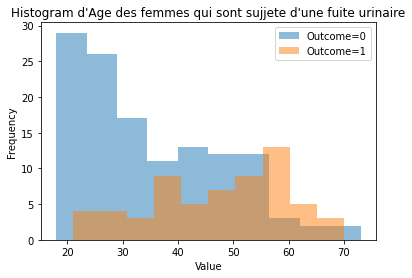

In [13]:
plot_histogram_dv(X['Age'], Y)

### c - Transform some data as mentioned in data dictionary
- some features need to be transformed 
- for example 'Nombredeparite', it must take the values 0, 1, 2
- so if it is greater than 2, it will be set to 2

In [14]:
toTwo_list = ['Nombredeparite', 'NombreAVBoisse', 'NombreAccouchCésarienne','NombreAccouchInstrumental','NombreEpisiotomie','NombreBebeMacrosomes']

In [15]:
# Function to trun all values >2 to 2
def toTwo_dataset(dataset, toTwo_list):
    for x in toTwo_list:
        dataset[x] = [2 if i>2 else i for i in dataset[x]]
    return dataset

In [16]:
toTwo_dataset(X,toTwo_list)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22.0,0.0,3.0,25.631167,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,59.0,3.0,3.0,33.203125,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,36.0,2.0,1.0,29.387755,2.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25.0,0.0,3.0,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45.0,2.0,2.0,33.203125,2.0,2.0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,25.0,0.0,3.0,21.258503,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
185,56.0,0.0,0.0,27.041644,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
186,45.0,1.0,0.0,27.555556,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
187,19.0,0.0,3.0,24.034610,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### d - Normalization
- Some data need to be normalized
- Set data in the range [0, 1]
- Features to be normalized are 'Age' and 'IMC'
- We will use MinMaxScaler() to normalize data
- We can also use StandardScaler()

In [17]:
# Create a list of columns names to be normalized
columns_to_be_normalized = ['Age', 'IMC']

In [18]:
# Normalization using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for item in columns_to_be_normalized:
    col_reshaped = X[item].values.reshape(-1, 1)
    X[item] = scaler.fit_transform(col_reshaped) 

In [19]:
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,0.072727,0.0,3.0,0.315921,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.745455,3.0,3.0,0.601801,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.327273,2.0,1.0,0.457751,2.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.127273,0.0,3.0,0.069339,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.490909,2.0,2.0,0.601801,2.0,2.0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.072727,0.0,3.0,0.405356,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,0.763636,2.0,1.0,0.439572,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
7,0.436364,2.0,1.0,0.679523,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.054545,0.0,3.0,0.076486,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.327273,0.0,3.0,0.283315,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [20]:
#export data after imputing
X.to_csv('data_imputed.csv',encoding = "latin-1", index=False)

## 3: Feature selection and model building
### a - Build model using processed data
- Logistic Regression (LR)
- K-nearest neighbors (KNN)
- Support Vector Machine (SVM)


In [21]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=0)

<div style="max-width:250px;margin-right: auto; margin-left: 0;"> 
    <img src=https://i.imgur.com/bywZdBZ.png width="250">
</div>

- La matrice de confusion est en quelque sorte un résumé des résultats de prédiction pour un problème particulier de classification. Elle compare les données réelles pour une variable cible à celles prédites par un modèle. Les prédictions justes et fausses sont révélées et réparties par classe, ce qui permet de les comparer avec des valeurs définies.

### Les métriques
Différentes métriques peuvent être calculées à partir du tableau de contingence afin d'en faciliter l'interprétation. C'est par exemple le cas du taux d'erreur, de la précision, du Recal et du F1 score... Ces indicateurs permettent de mieux apprécier la qualité de précision du modèle.

#### L'AUC ROC 
- Il permet d’évaluer la performance globale d’un modèle. Il est égal à 100% pour un modèle parfait et à 50% pour un modèle non-informatif. La performance d’un modèle de Machine Learning se situe donc entre ces valeurs.

####  Accuracy 

- Ce paramètre fait la somme de tous les vrais positifs et vrais négatifs qu'il divise par le nombre total d'instances (TP+TN)/Total. Il permet d'apporter une réponse à la question suivante : de toutes les classes positives et négatives, combien parmi elles ont été prédites correctement ?

#### Support

- Le support est le nombre d'échantillons vraie qui se trouvent dans la classe ciblé.

#### Précision

- <div style="max-width:200px;margin-right: auto; margin-left: 0;"> 
    <img src=https://i.imgur.com/8TixMfU.png width="200">
</div>

- La précision indique le rapport entre les prévisions positives correctes et le nombre total de prévisions positives. Ce paramètre répond donc à la question suivante : sur tous les enregistrements positifs prédits, combien sont réellement positifs ?

#### Recall
- <div style="max-width:200px;margin-right: auto; margin-left: 0;"> 
    <img src=https://i.imgur.com/a5D0i4y.png width="200">  
</div>

- Le rappel (ou recall en anglais) est un paramètre qui permet de mesurer le nombre de prévisions positives correctes sur le nombre total de données positives. Il permet de répondre à la question suivante : sur tous les enregistrements positifs, combien ont été correctement prédits ?

#### F1-Score
- <div style="max-width:200px;margin-right: auto; margin-left: 0;"> 
    <img src=https://i.imgur.com/FObfK4q.png width="200">
</div>

- Le score F1 (ou F-measure en anglais) est une moyenne harmonique de la précision et du rappel. Il équivaut au double du produit de ces deux paramètres sur leur somme. Sa valeur est maximale lorsque le rappel et la précision sont équivalents.

- Dans certains modèles, on cherche à connaître la distribution des faux positifs et des faux négatifs. La métrique score F1 est alors utilisée pour évaluer la performance de l'algorithme. De même, il est particulièrement difficile de comparer deux modèles avec une faible précision et un rappel élevé. Le contraire est également vérifié. Dans ces conditions, le score F1 permet de mesurer ces deux paramètres simultanément.

### - Importing Libraries 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 

### - Logistic Regression (LR)

In [47]:
# Function to build model and find model performance

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
pred=model_LR.predict(X_test)

#### - Function to display confusion matrix as a heatmap

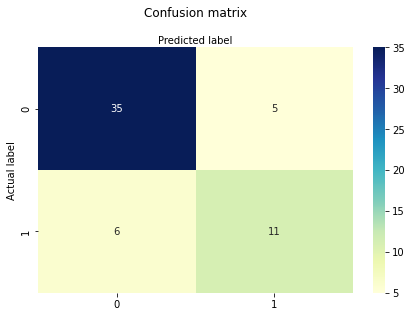

In [48]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def confusion_matrix(y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


confusion_matrix(pred)

In [49]:
y_hat = [x[1] for x in model.predict_proba(X_test)]
print("auc_roc : ",roc_auc_score(y_test, y_hat))
print("accuracy_score :",metrics.accuracy_score(y_test,y_pred=pred),"\n")
print("Classfication report : \n",classification_report(y_test,pred))

auc_roc :  0.788970588235294
accuracy_score : 0.8070175438596491 

Classfication report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.69      0.65      0.67        17

    accuracy                           0.81        57
   macro avg       0.77      0.76      0.77        57
weighted avg       0.80      0.81      0.81        57



### - K Nearest Neighbour (KNN)

In [113]:
model_KNN = KNeighborsClassifier(n_neighbors=7)
model_KNN.fit(X_train,y_train)
pred =model_KNN.predict(X_test)

y_hat = [x[1] for x in model.predict_proba(X_test)]
print("auc_roc : ",roc_auc_score(y_test, y_hat))
print("accuracy_score :",metrics.accuracy_score(y_test,y_pred=pred),"\n")
print("Classfication report : \n",classification_report(y_test,pred))

auc_roc :  0.8338235294117646
accuracy_score : 0.7894736842105263 

Classfication report : 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        40
           1       0.73      0.47      0.57        17

    accuracy                           0.79        57
   macro avg       0.77      0.70      0.72        57
weighted avg       0.78      0.79      0.77        57



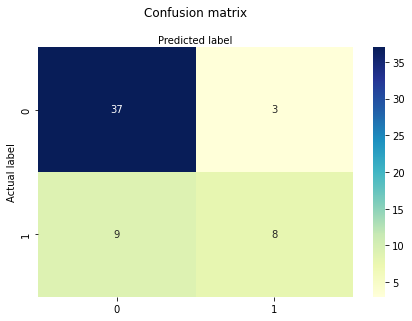

In [114]:
confusion_matrix(pred)

### - Support Vector Machine (SVM)

In [115]:
#generating the model
model_SVM = svm.SVC(kernel="linear")
model_SVM = svm.SVC(probability=True)
#train the model
model_SVM.fit(X_train,y_train)
#predict the response
pred = model_SVM.predict(X_test)


y_hat = [x[1] for x in model.predict_proba(X_test)]
auc_processed = roc_auc_score(y_test, y_hat)
print("auc_roc : ",roc_auc_score(y_test, y_hat))
print("accuracy_score :",metrics.accuracy_score(y_test,y_pred=pred),"\n")
print("Classfication report : \n",classification_report(y_test,pred))


auc_roc :  0.8338235294117646
accuracy_score : 0.7894736842105263 

Classfication report : 
               precision    recall  f1-score   support

           0       0.78      0.97      0.87        40
           1       0.86      0.35      0.50        17

    accuracy                           0.79        57
   macro avg       0.82      0.66      0.68        57
weighted avg       0.80      0.79      0.76        57



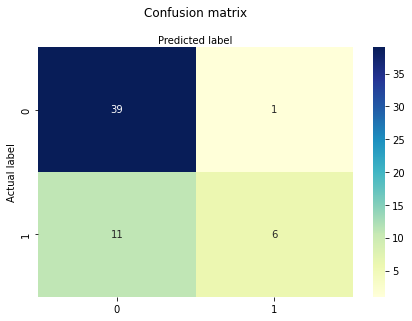

In [116]:
confusion_matrix(pred)

## 4 : Amélioration  du modèle
### A - Validation set
- A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.

- The validation dataset is different from the test dataset that is also held back from the training of the model, but is instead used to give an unbiased estimate of the skill of the final tuned model when comparing or selecting between final models.

### B - Cross Validation
- Cross-validation is a statistical method used to estimate the skill of machine learning models. It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

In [28]:
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(7)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7424501424501424

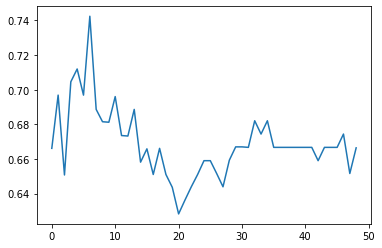

In [29]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

### C - GridSearchCV
-  GridSearchCV is a tool that helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters

In [44]:
from sklearn.model_selection import GridSearchCV

#### - Logistic Regression HyperParameters

- Solver: https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
- L1 and L2 Regularisation: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
- Slearn Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [40]:
param_grid_LR =  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                  'C' : np.logspace(-4, 4, 20),
                  'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                  'max_iter' : [100, 1000,2500, 5000]}

In [102]:
grid_LR = GridSearchCV(model_LR, param_grid = param_grid_LR, cv = 3, verbose=True, n_jobs=-1) # cv = Cross Validation
grid_LR.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\Elyes\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.65909091 ...        nan 0.67424242 0.67424242]
  warnings.warn(
C:\Users\Elyes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=3,
             estimator=LogisticRegression(C=1.623776739188721, solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [103]:
print(grid_LR.best_params_)

{'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}


In [104]:
model_LR = grid_LR.best_estimator_
print("Accuracy_score :",model_LR.score(X_test, y_test))

Accuracy_score : 0.8070175438596491


#### - Support Vector Machine HyperParameters

- C : The C parameter in SVM is Penalty parameter of the error term. You can consider it as the degree of correct classification that the algorithm has to meet or the degree of optimization the the SVM has to meet.
- Gamma : The gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

- Kernel : SVM plays an important role in classification. Here different kernel parameters are used as a tuning parameter to improve the classification accuracy. There are mainly four different types of kernels (Linear, Polynomial, RBF, and Sigmoid) that are popular in SVM classifier.

In [109]:
param_grid_SVM = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

In [110]:
grid_SVM = GridSearchCV(model_SVM, param_grid = param_grid_SVM, cv = 2, verbose=True, n_jobs=-1) # cv = Cross Validation
grid_SVM.fit(X_train,y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


GridSearchCV(cv=2, estimator=SVC(C=10, gamma=0.1, probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=True)

In [111]:
print(grid_SVM.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [112]:
model_SVM = grid_SVM.best_estimator_
print("Accuracy_score :",model_SVM.score(X_test, y_test))

Accuracy_score : 0.7894736842105263


#### - K Nearest Neighbour HyperParameters

In [73]:
param_grid_KNN = {'n_neighbors': np.arange(1, 20),
                  'metric': ['euclidean', 'manhattan']}

In [80]:
grid_KNN = GridSearchCV(model_KNN, param_grid = param_grid_KNN, cv = 5, verbose=True) # cv = Cross Validation
grid_KNN.fit(X_train,y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=7),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             verbose=True)

In [81]:
print(grid_KNN.best_params_)

{'metric': 'euclidean', 'n_neighbors': 7}


In [79]:
model_KNN = grid_KNN.best_estimator_
print("Accuracy_score :",model_KNN.score(X_test, y_test))

Accuracy_score : 0.7894736842105263
